가중치 시각화
- 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.

In [1]:
from tensorflow import keras
model= keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
# 첫번째 합성곱 층의 가중치 확인. weight속성에 저장되어있어 첫번째 원소(가중치)와 두번째 원소(절편) 크기 출력
conv =model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [4]:
conv=model.layers[2]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 32, 64) (64,)


In [5]:
# 가중치 배열의 평균과 표준편차 계산
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.039616928 0.15762433


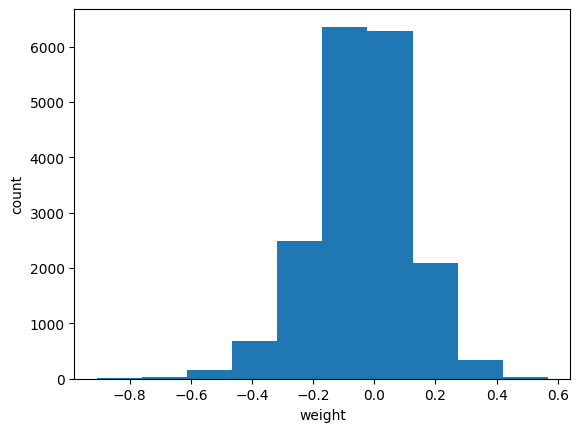

In [6]:
# 히스토그램으로 가중치 분포 확인
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

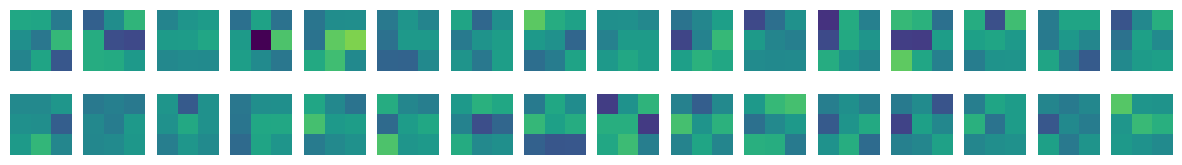

In [7]:
# 32개의 커널을 16개씩 2줄에 출력.
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 +j], vmin=-0.5, vmax=0.5)  #vmin과 vmax로 맷플롯립의 컬러맵으로 표현할 범위 지정.
        axs[i,j].axis('off')
plt.show()

In [8]:
# 훈련한 가중치와 비교하기 위해 훈련하지 않은 빈 합성곱 신경망 만들기. 
# 모델을 만들고 Conv2D 층 하나 추가하기
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [9]:
# 첫번째 층의 가중치 저장.
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
# 가중치의 평균과 표준편차 확인
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0038863916 0.081685215


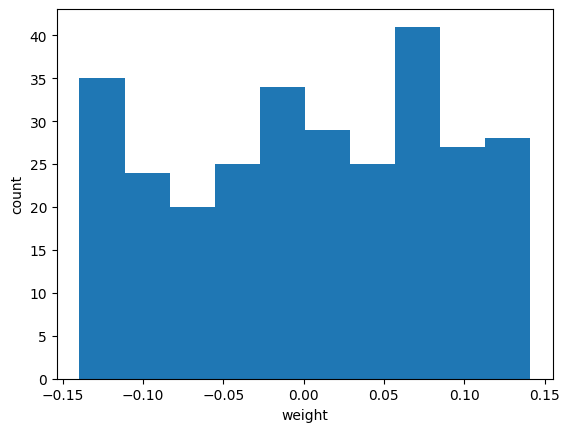

In [11]:
# 히스토그램으로 가중치 배열 확인
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

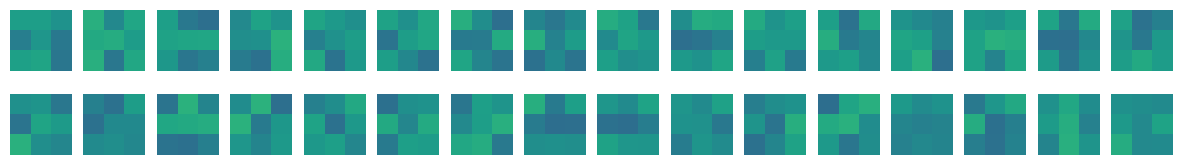

In [12]:
# 그림으로 출력
fig, axs =plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16 +j],vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

함수형 API(functional API)
- 케라스 Sequential  클래스보다 더 유연한 모델을 생성하는 방법.
- 어느 층을 함수의 입력값으로 하여 결과값을 출력하는 방식으로 구현

In [13]:
# Dense 층 2개로 이루어진 완전연결신경망을 함수형 API로 구현
# dense1=keras.layers.Dense(100, activation='sigmoid')
# dense2=keras.layers.Dense(10, activation='softmax')

In [14]:
# 첫번째 층 호출
# hidden=dense1(inputs)

In [15]:
# 두번째 층 호출
# outputs = dense2(hidden)

In [16]:
# model클래스에 입력과 출력을 지정하여 모델 생성
# model = keras.Model(inputs, outputs)

In [17]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [18]:
# model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델 생성
conv_acti=keras.Model(model.input, model.layers[0].output)

특성 맵 시각화
- 합성곱 층의 활성화 출력을 이미지로 그리는 것.
- 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화 시키는지 확인 할수 있다.

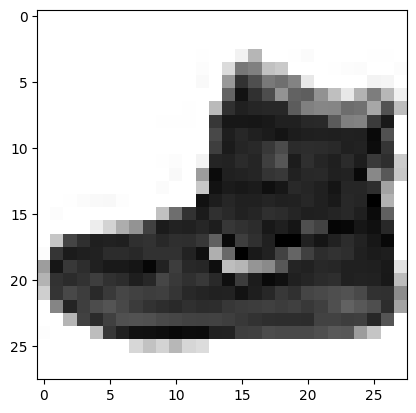

In [19]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [20]:
# 위 샘플을 conv_acti모델에 주입하여 Cinv2D 층이 만드는 특성맵 출력
inputs=train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps =conv_acti.predict(inputs)

1/1 [==============================] - 1s 577ms/step


In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


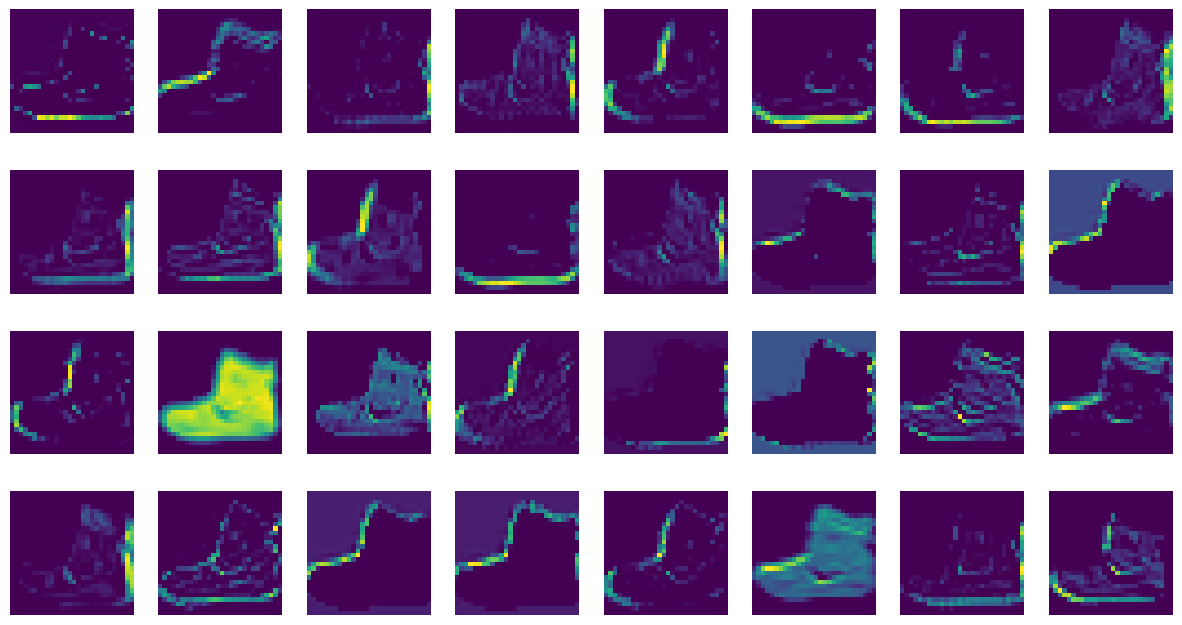

In [23]:
# 4개의 행으로 나누어 특성 맵 그리기
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 +j])
        axs[i,j].axis('off')
plt.show()

In [24]:
# 두번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델 만들기
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [25]:
# 첫번째 샘플을 conv2_acti 모델의 predict()메서드에 전달
inputs = train_input[0:1].reshape(-1,28,28,1) /255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 171ms/step


In [26]:
print(feature_maps.shape)

(1, 14, 14, 64)


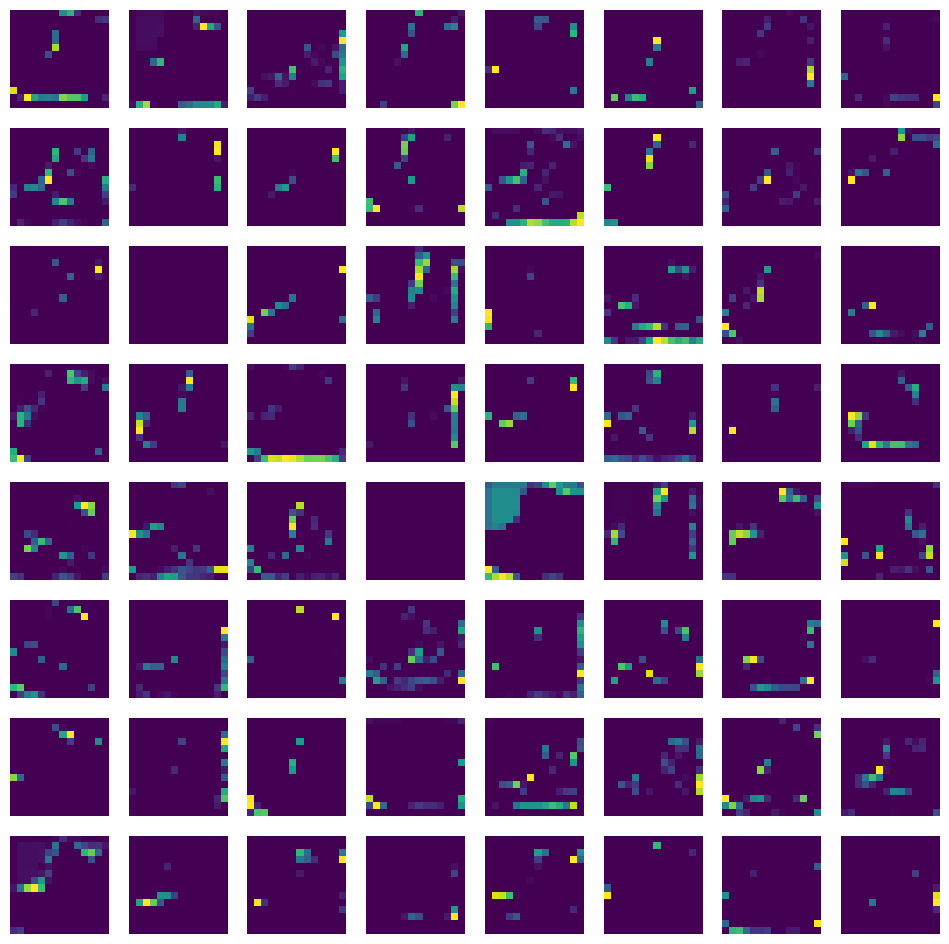

In [27]:
# 특성맵을 8개씩 나누어 그리기
fig,axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 +j])
        axs[i,j].axis('off')
plt.show()

합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고,
뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼수 있다.